In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/leukemia-classification/C-NMC_Leukemia/validation_data/C-NMC_test_prelim_phase_data_labels.csv
/kaggle/input/leukemia-classification/C-NMC_Leukemia/validation_data/C-NMC_test_prelim_phase_data/518.bmp
/kaggle/input/leukemia-classification/C-NMC_Leukemia/validation_data/C-NMC_test_prelim_phase_data/1307.bmp
/kaggle/input/leukemia-classification/C-NMC_Leukemia/validation_data/C-NMC_test_prelim_phase_data/1048.bmp
/kaggle/input/leukemia-classification/C-NMC_Leukemia/validation_data/C-NMC_test_prelim_phase_data/1399.bmp
/kaggle/input/leukemia-classification/C-NMC_Leukemia/validation_data/C-NMC_test_prelim_phase_data/1661.bmp
/kaggle/input/leukemia-classification/C-NMC_Leukemia/validation_data/C-NMC_test_prelim_phase_data/1577.bmp
/kaggle/input/leukemia-classification/C-NMC_Leukemia/validation_data/C-NMC_test_prelim_phase_data/665.bmp
/kaggle/input/leukemia-classification/C-NMC_Leukemia/validation_data/C-NMC_test_prelim_phase_data/1212.bmp
/kaggle/input/leukemia-classification

In [2]:
import os 
import random

import pandas as pd
import numpy as np

import cv2
from PIL import Image

import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

from timeit import default_timer as timer

import tensorflow as tf
from tensorflow.keras.models import Sequential
from keras.utils.np_utils import to_categorical
from tensorflow.keras import models, layers, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Dense, Activation,Flatten, Conv2D, MaxPool2D,Dropout

In [3]:
all_0 = "../input/leukemia-classification/C-NMC_Leukemia/training_data/fold_0/all"
all_1 = "../input/leukemia-classification/C-NMC_Leukemia/training_data/fold_1/all"
all_2 = "../input/leukemia-classification/C-NMC_Leukemia/training_data/fold_2/all"

hem_0 = "../input/leukemia-classification/C-NMC_Leukemia/training_data/fold_0/hem"
hem_1 = "../input/leukemia-classification/C-NMC_Leukemia/training_data/fold_1/hem"
hem_2 = "../input/leukemia-classification/C-NMC_Leukemia/training_data/fold_2/hem"

path_val ='../input/leukemia-classification/C-NMC_Leukemia/validation_data/C-NMC_test_prelim_phase_data'
val_labels = pd.read_csv('../input/leukemia-classification/C-NMC_Leukemia/validation_data/C-NMC_test_prelim_phase_data_labels.csv')



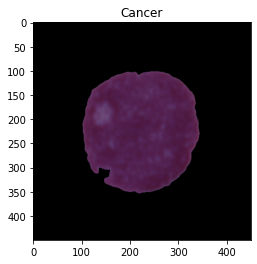

In [4]:
a_image_fnames = os.listdir(all_0)
cancer_img = cv2.imread(os.path.join(all_0,a_image_fnames[5]))
plt.imshow(cancer_img)
plt.title('Cancer')
plt.show()
#cv2.imwrite('C:/Users/Hp/lukemia/Cancer.bmp',cancer_img)
#plt.savefig('C:/Users/Hp/lukemia/Cancer.bmp')

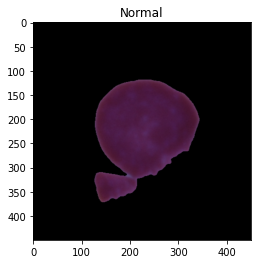

In [5]:
h_image_fnames = os.listdir(hem_0)
h_img = cv2.imread(os.path.join(hem_0,h_image_fnames[5]))
plt.imshow(h_img)
plt.title('Normal')
plt.show()
#plt.savefig('C:/Users/Hp/lukemia/Normal.bmp')

In [6]:
##Get the shape of the image
h_img.shape

(450, 450, 3)

In [7]:
def get_path_image(folder):
    image_paths = []
    if os.path.exists(folder):
        image_fnames = os.listdir(folder)
        for img_id in range(len(image_fnames)):
            img = os.path.join(folder,image_fnames[img_id])
            image_paths.append(img)  
    else:
        print("error folder not found", folder )
    return image_paths  
        

In [8]:
#image absolute paths for cancer cells and normal cells
cancer_lst = []

for i in [all_0,all_1,all_2]:
    paths = get_path_image(i)
    cancer_lst.extend(paths)
print('No. of cancer images:', len(cancer_lst))

normal_lst = []
for i in [hem_0,hem_1,hem_2]:
    paths = get_path_image(i)
    normal_lst.extend(paths)
print('No. of normal images:', len(normal_lst))    
    

No. of cancer images: 7272
No. of normal images: 3389


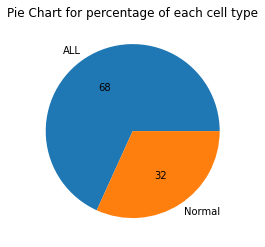

In [9]:
cancer_dict = {"x_col":cancer_lst, "y_col":[np.nan for x in range(len(cancer_lst))]}
cancer_dict["y_col"] = "ALL"

normal_dict = {"x_col":normal_lst, "y_col":[np.nan for x in range(len(normal_lst))]}
normal_dict["y_col"] = "HEM"


cancer_df = pd.DataFrame(cancer_dict)
normal_df = pd.DataFrame(normal_dict)

#train_df = cancer_df.append(normal_df, ignore_index=True)

plt.pie([len(cancer_lst),len(normal_lst)],labels=["ALL","Normal"],autopct='%.f')
plt.title('Pie Chart for percentage of each cell type')
plt.show()